# 1 Difference Equations

Simulating models based on a difference equation is straightforward: simply apply the given equation over and over again, in an iterative way. After every step, the result needs to be stored in an appropriate data structure (MATLAB array).

As a light start into this tutorial this is ideal, as you can focus on familiarising yourselves with the programming environment, before getting into more complicated issues.

In [1]:
% Setup etc.: nothing so far

### 1.1 First-order difference equation: Cobweb model

In the first exercise, we are going to look at a simple first-order difference equation, the basic version of the Cobweb model from the first tutorial. The equation we recover from the model is

$p_t = -\frac{\delta}{\beta}p_{t-1}+\frac{\alpha + \gamma}{\beta}$

It is generally good practice in programming to separate different parts of the procedure, so it is easier to keep a good overview of the code. Code that is used multiple times should be wrapped in a function. In this case, a single line (the equation) suffices for the single time step and hence it wouldn't be so necessary to write a separate function for it. However, it still seems appropriate to break up the problem into smaller parts, at least for educational purposes.

##### EXERCISE

Write the function for 1 time step (i.e. from time $t$ to $t+1$) in the cell below. It takes as arguments the current price, as well as the model parameters $\alpha$, $\beta$, $\gamma$, $\delta$, and returns the next period's price.

In [2]:
Cobweb_1step = @(p_t, alpha, beta, gamma, delta) -delta/beta*p_t+(alpha+gamma)/beta; 

##### EXERCISE

Now we have to iterate this equation several times in order to analyse the dynamic behaviour of the model. Write the for-loop that applies your 1-step function $T$ times ($T$ and the model parameters are defined below, feel free to play around with the values) and store the results in the results list (append the new price after every iteration).

In [3]:
% number of steps to iterate through
T = 10;

% model parameters
alpha = 2;
beta = 0.75;
gamma = 1.5;
delta = 1;

% initial price
p_0 = 1;

% initialise results list (preallocation of arrays is a good idea in MATLAB)
results = NaN(1, T + 1);
% insert initial price in results list
results(1) = p_0;

% for loop to apply model function iteratively T times: fill out the actual body of the loop
for t = 1:T
    results(t + 1) = Cobweb_1step(results(t), alpha, beta, gamma, delta);
end

To check what happens, you can display the list of results, or plot the time series. Below, I provide code for both. What happens if you start in the steady state instead of the given initial price? How can you change the model behaviour, e.g. such that it becomes stable?

In [4]:
disp(results)

  Columns 1 through 8

   1.000000000000000   3.333333333333334   0.222222222222222   4.370370370370370  -1.160493827160493   6.213991769547324  -3.618655692729765   9.491540923639686

  Columns 9 through 11

  -7.988721231519581  15.318294975359443 -15.757726633812588



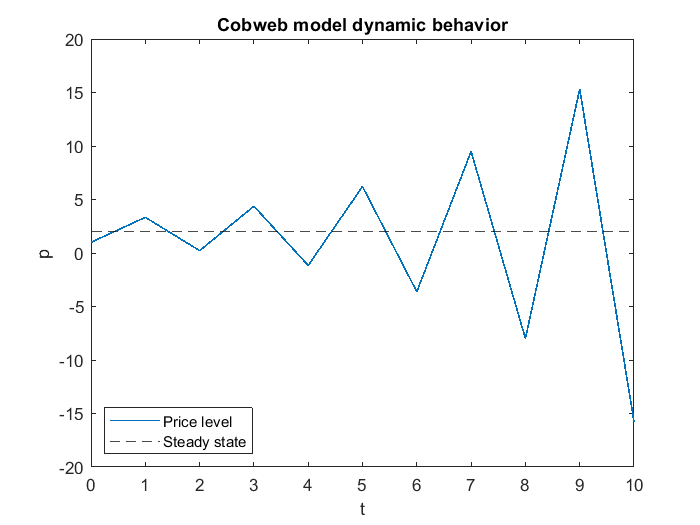

In [5]:
steady_state = (alpha + gamma) / (beta + delta);

% plot results with slightly thinner linewidth than default (looks nicer in my opinion)
plot(0:T, results, LineWidth = 1, DisplayName = "Price level")

% horizontal line to indicate steady state
yline(steady_state, LineWidth = 1, LineStyle = "--", Color = "black", DisplayName = "Steady state")

% xis labels etc.
xlabel("t")
ylabel("p")
title("Cobweb model dynamic behavior")
legend(Location = "southwest")


### 1.2 Second-order difference equation

Here we are looking at the equation of exercise 0 c) (ii) in the first tutorial:

$y_t = 1.1y_{t-1} - 0.6y_{t-2} + 1100$.

##### EXERCISE

Write a function that implements one time step, then apply this function iteratively to simulate the model's behaviour over time.

Instead of implementing it strictly with the parameters 1.1, -0.6 and 1100, leave these as abstract parameters a, b, and c. That way, you can change your model parameters more easily and check how the model changes.

In [6]:
second_order_1step = @(y_1, y_2, a, b, c) a*y_1+b*y_2+c; 

##### EXERCISE

Write a for-loop that runs this model $T$ times

In [7]:
% model parameters
a = 1.1;
b = -0.6;
c = 1100;

% number of times steps to be performed
T = 25;

% preallocate results array; different name than the list last time
results2 = NaN(1, T + 1);

% initial conditions
results2(1:2) = [1300, 1600];

% apply one step T times
for t = 2:T
    results2(t + 1) = second_order_1step(results2(t), results2(t - 1), a, b, c);
end

#### Plotting the results

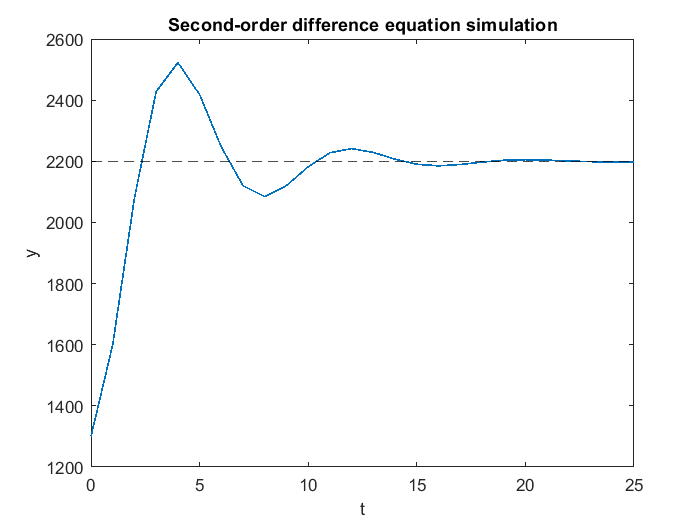

In [8]:
% steady state
ss = 1100 / (1 - a - b);

plot(0:T, results2, LineWidth = 1, DisplayName = "Actual value")
yline(ss, LineStyle = "--", Color = "black", LineWidth = 1, DisplayName = "Steady state")
xlabel("t")
ylabel("y")
title("Second-order difference equation simulation")


### Bonus

Implement and plot any other model form the first tutorial or the additional exercise, section 1. Plot the results to find out how it behaves.